## 2A - L6: Edge Detection: 2D Operators

In [14]:
import cv2
import matplotlib.pyplot as plt

##### Load the img

In [142]:
img = cv2.imread("data/chess-board.jpg")

In [143]:
img.shape

(2021, 3032, 3)

##### Resize the Img

In [144]:
h, w, _ = img.shape

In [145]:
dim = (w//2, h//2)

In [146]:
img = cv2.resize(img, dim)

In [147]:
img.shape

(1010, 1516, 3)

##### Select a single channel

In [148]:
img = img[:, :, 1]

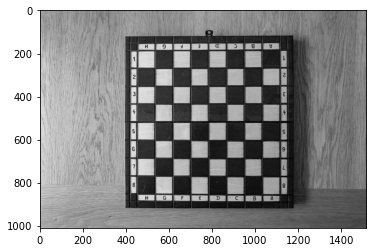

In [149]:
plt.imshow(img, cmap="gray")

### Canny Edge Detection

In [152]:
high_threshold = 350
low_threshold = 300
edges = cv2.Canny(img, low_threshold, high_threshold)

Text(0.5, 1.0, 'Canny Edge Detection')

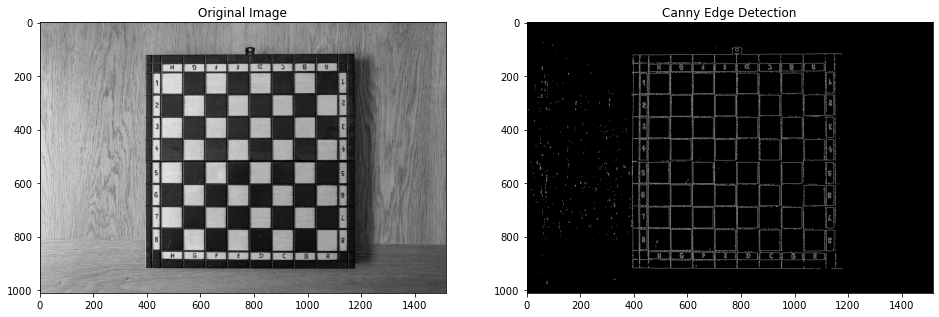

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edge Detection")

#### Using skimage canny operator

In [202]:
from skimage import feature

##### Plot canny edge detector with varying sigma

In [216]:
high_threshold = 200
low_threshold = 150

Text(0.5, 1.0, 'Sigma=2')

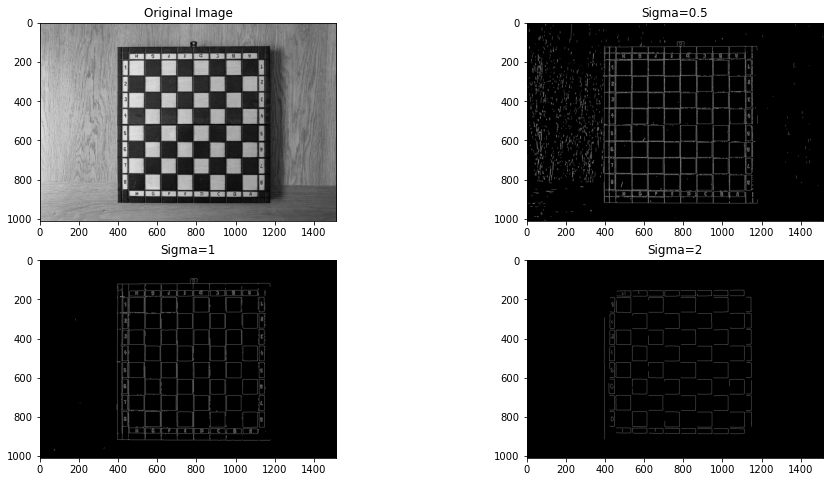

In [222]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].imshow(img, cmap="gray")
ax[0, 0].set_title("Original Image")

edges = feature.canny(img, 0.5, low_threshold, high_threshold)
ax[0, 1].imshow(edges, cmap="gray")
ax[0, 1].set_title("Sigma=0.5")

edges = feature.canny(img, 1, low_threshold, high_threshold)
ax[1, 0].imshow(edges, cmap="gray")
ax[1, 0].set_title("Sigma=1")

edges = feature.canny(img, 2, low_threshold, high_threshold)
ax[1, 1].imshow(edges, cmap="gray")
ax[1, 1].set_title("Sigma=2")

### Laplacian edge detection

##### Smooth the image

In [274]:
sigma = 2
smoothed_img = cv2.GaussianBlur(img, (7, 7), sigmaX=sigma, sigmaY=sigma)

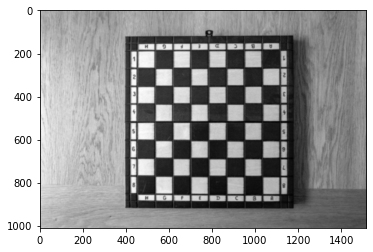

In [275]:
plt.imshow(smoothed_img, cmap="gray")

In [276]:
ddepth = cv2.CV_16S
kernel_size = 3

edges = cv2.Laplacian(smoothed_img, ddepth, kernel_size)
edges = cv2.convertScaleAbs(edges)

Text(0.5, 1.0, 'Laplacian Edge Detection')

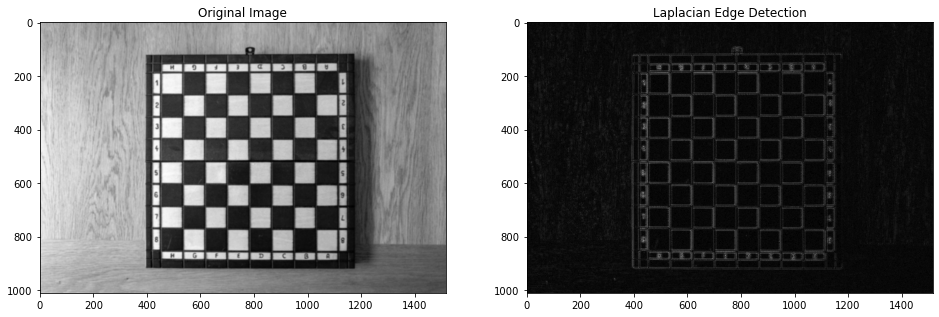

In [277]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(smoothed_img, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Laplacian Edge Detection")

#### Using Skimage

In [269]:
from skimage.filters import laplace, gaussian
from skimage.util import img_as_ubyte

##### Using laplacian operator after smoothing with varying sigma

Text(0.5, 1.0, 'Sigma=3')

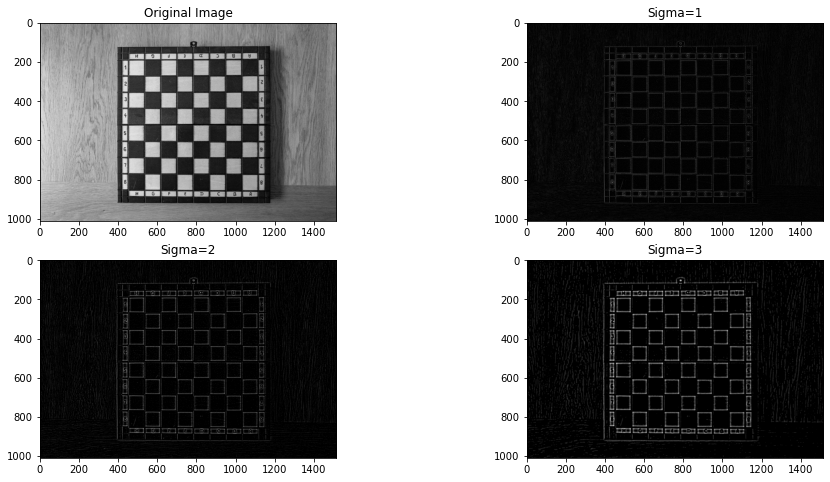

In [273]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].imshow(img, cmap="gray")
ax[0, 0].set_title("Original Image")

smoothed_img = gaussian(img, sigma=1)
edges = laplace(smoothed_img, 4)
ax[0, 1].imshow(img_as_ubyte(edges), cmap="gray")
ax[0, 1].set_title("Sigma=1")

smoothed_img = gaussian(img, sigma=2)
edges = laplace(smoothed_img, 4)
ax[1, 0].imshow(img_as_ubyte(edges), cmap="gray")
ax[1, 0].set_title("Sigma=2")

smoothed_img = gaussian(img, sigma=3)
edges = laplace(smoothed_img, 4)
ax[1, 1].imshow(img_as_ubyte(edges), cmap="gray")
ax[1, 1].set_title("Sigma=3")

We can see that skimage performs better